####  Swarm robotics
 * Box Pushing
 * Manipulation
#### Reconfigurable Robotics
 * chain type
 * lattice type
 * hybrid type
 * modular soft robots
 
#### Evolutionary Robotics
 * morphologies
 * control strategies

 


# Introduction
## Goal.
The goal of this lab is to investigate, by means of agent-based simulations, an example
of Evolutionary Robotics. In particular, we will focus on a maze navigation robot task, and see
how Evolutionary Algorithms can be used to solve this problem.

Note once again that, unless otherwise specified, in this module’s exercises we will use real-valued
genotypes and that the aim of the algorithms will be to minimize the fitness function $f(x)$, i.e.
lower values correspond to a better fitness!

# Exercise 1
In this exercise we will perform an Evolutionary Robotics experiment to evolve the controller of a robot navigating a certain environment. This task is usually referred to as **“maze navigation”**. In principle, this kind of experiments can be done in hardware, i.e. with physical robots and a physical arena (this kind of approach is usually called embodied evolution). While embodied evolution is a quite powerful approach, it also presents several challenges due to limited battery lifetime, hardware issues/faults, costs, time-consuming experiments, etc. Here, for simplicity we will perform similar experiments in silico, i.e. by means of agent-based simulations. Note however that this is actually the typical approach used in Evolutionary Robotics, where usually simulations are performed first, and then the simulated experiments are replicated in materio (i.e. with physical hardware), to assess the so-called “reality-gap” and validate the solution.

**Here, we will perform simplified 2-D kinematic simulations of a maze navigation task performed by an agent represented by a car.**

The task is to drive from the bottom left of the map to the green zone in the upper right corner.
**The car is equipped with 6 sensors: distance and bearing to the target position and, optionally, 4 lidar sensors. 
The first two return the distance and the angle between the car and the target. The lidars return the distance between the car and a possible obstacle in the range $[0,1]$. Hence, a value of $1$ indicates that there are no obstacles in the range of the lidar ($100$ pixels).
Instead, if a lidar returns $0$ it indicates that the car is colliding with an obstacle.**

A Feed Forward Neural Network (FFNN) moves the car on the map. **The FFNN has $2$ or $6$ inputs, depending on if the lidars are activated, and $5$ outputs. The agent selects the action by the argmax of the outputs, and the possible actions are:** **turn left** or **right**, **accelerate** or **decelerate**, and **stop the car.**
**The hidden structure of the network is composed of $l$ layers of $n$ nodes, where $l$ and $n$ are configurable parameters.**

**The evolutionary algorithm has to optimize the weights of the FFNN, and the total number of parameters is $inputs \times n + l \times n^2 + n \times outputs$ if $n>=1$ else $inputs \times  outputs$. 
All the network’s weights range in $[−3, 3]$.**

This script will perform a maze navigation Evolutionary Robotics experiment in a first scenario (environment without obstacles). This experiment uses an Evolutionary Algorithm to **evolve the synaptic weights of the described Neural Network.****The synaptic weights, which represent the genes of the individuals, are coded using real-coded values (floating point). A population of such individuals is evolved, using tournament selection, Gaussian mutation, n-point crossover,
and elitism** (see exercise_maze.py for more details about the algorithmic configuration and parametrization). The genotypes of the first generation are initialized randomly in the range $[-3,3]$. Elitism is used to make sure that good solutions are not lost because of mutation or crossover, while the rest of the population is generated by means of the genetic operators. **At each generation, the genotypes (i.e., the encoded controllers) generated by the EA are sent to the simulator (one batch per generation), which then translates the genotypes it receives into a set of Neural Network controllers, evaluates the controllers and sends the fitness back to the EA.**
At the end of the evolutionary process, the script will save a pickle containg the best genome (file best_seed.pkl, where seed is the seed used) found, and other information needed to run the simulation a posteriori.
You can “replay” the best candidate, by running this command:

``python3 post_eval.py best.pkl``

where ``best.pkl`` is the path to the pickle file.

---

Design and implement a fitness function that would allow the robot to reach the target as fast as possible. To do so, you can modify the function ``fitness_eval`` coded in the next cell. Five metrics are computed by the simulator and can be used to devise different fitness functions, namely:
- *distanceToTarget*: the distance to target at the end of the simulation (default);
- *pathLength*: the total distance traveled by the robot;
- *noOfTimestepsWithCollisions*: the no. of timesteps when the robot had a collision with an obstacle or a wall (ranging in [0,250]);
- *timestepToReachTarget*: the no. of timesteps needed for the robot to reach the target (ranging in [0,250]);
- *timestepsOnTarget*: the no. of timesteps spent by the robot on the target (ranging in [0,250]);

By using one or more of these five quantities properly into one single fitness value, different robot behaviors can be evolved. Please note that, by default, the RobotEvaluator is formulated as a minimization problem (see the flag ``maximize = False``). However, if you deem it more appropriate, you can change the flag to turn it into a maximization problem. 
**NOTE**: While you design the fitness function, be careful about divisions by zero and make sure that when you divide one integer variable by another you cast your variables to float, to avoid unexpected behaviors due to integer divisions.

- **Is the Evolutionary Algorithm able to evolve a Neural Network controller that can reach the target? What kind of motion strategy does it use?**
- **What is the minimum-complexity Neural Network controller that you can think of? Hint: think about the necessity of using all the available sensor inputs in this case, and if any of them can be discarded (see the configuration dictionary to disable inputs). Also, consider reducing the no. if hidden nodes and test different network configurations to identify the simplest controller.**
- **By looking at the weights of the best evolved Neural Network in the simplest case you just found, can you try to make sense of the controller functioning? (Note that weights appear ordered by layer and, for each layer, by node.)**

### distance to target and no hidden layers

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         10 1762.53368 753.740671 1607.93079 1496.09989 288.702645

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         20 1538.48659 478.608399 1350.07333 1111.09404 358.550861

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         30 1532.63074 104.043260 753.740671 847.601161 417.048164

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         40 753.740671 104.043260 390.884211 400.070139 247.030531

Generation Evaluation      Worst       Best     Median    Average    Std

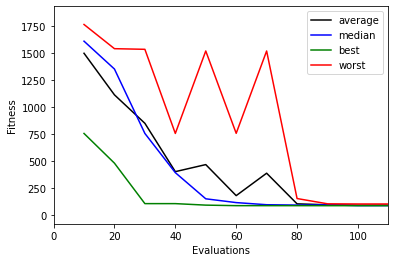

In [9]:
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map

def fitness_eval(distanceToTarget, pathLength, noOfTimestepsWithCollisions, timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget
    return fitness

config = {"sensors": True,
            "nrHiddenNodes":  0,
            "nrHiddenLayers": 0,
            "map":"white.png"
         }
seed = 0
rng = NumpyRandomWrapper(seed)

# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 10  # population size
numGen = 10  # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 2  # tournament size (default 2)
mutationRate = 0.1 # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.5  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 1  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 3  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
ea.selector = inspyred.ec.selectors.tournament_selection

# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
ea.replacer = inspyred.ec.replacers.generational_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
#print('best_candidate', best_candidate,"\n")

best_fitness = final_pop[0].fitness
print('best_fitness', best_fitness,"\n")


os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_"+"distance_to_target"+".pkl", "wb"))

#### Not able to reach the green zone

In [1]:
import os
os.popen("python post_eval.py results/best_distance_to_target.pkl").read()

'pygame 2.1.2 (SDL 2.0.18, Python 3.8.8)\nHello from the pygame community. https://www.pygame.org/contribute.html\n'

### distance to target and 1 hidden nodes in 1 hidden layer

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         10 1762.53368 414.802362 1457.96099 1237.26156 484.813702

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         20 1582.79783 414.802362 754.801298 864.276581 325.309530

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         30 1672.58034 414.802362 754.801298 953.430633 398.852764

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         40 754.801298 383.537481 753.806347 682.758824 141.973896

Generation Evaluation      Worst       Best     Median    Average    Std

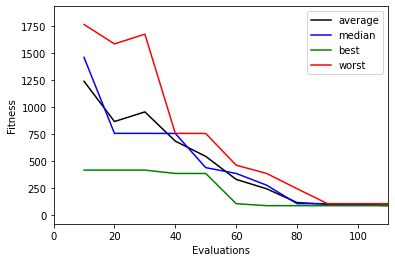

In [16]:
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map

def fitness_eval(distanceToTarget, pathLength, noOfTimestepsWithCollisions, timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget
    return fitness

config = {"sensors": True,
            "nrHiddenNodes": 1,
            "nrHiddenLayers": 1,
            "map":"white.png"
         }
seed = 0
rng = NumpyRandomWrapper(seed)

# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 10  # population size
numGen = 10  # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 2  # tournament size (default 2)
mutationRate = 0.1 # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.5  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 1  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 3  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
ea.selector = inspyred.ec.selectors.tournament_selection

# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
ea.replacer = inspyred.ec.replacers.generational_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
#print('best_candidate', best_candidate,"\n")

best_fitness = final_pop[0].fitness
print('best_fitness', best_fitness,"\n")


os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_"+"distance_to_target_1_hidden_1_nodes"+".pkl", "wb"))

#### Green Goal reached

In [25]:
os.popen("python post_eval.py results/best_distance_to_target_1_hidden_1_nodes.pkl").read()

''

### distance to target and 3 hidden nodes in 1 hidden layer

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         10 1762.53368 1350.07333 1672.58034 1607.36913 139.937340

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         20 1547.73544 104.043260 1391.46436 1239.97858 437.411842

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         30 1545.41288 104.043260 805.515411 827.530088 540.243512

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         40 754.801298 85.5862138 104.043260 232.349163 261.283115

Generation Evaluation      Worst       Best     Median    Average    Std

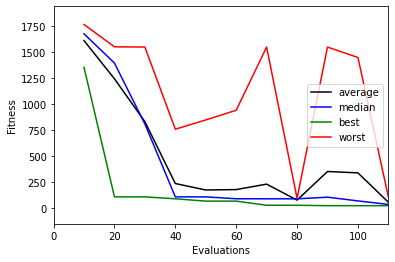

In [14]:
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map

def fitness_eval(distanceToTarget, pathLength, noOfTimestepsWithCollisions, timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget
    return fitness

config = {"sensors": True,
            "nrHiddenNodes": 3,
            "nrHiddenLayers": 1,
            "map":"white.png"
         }
seed = 0
rng = NumpyRandomWrapper(seed)

# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 10  # population size
numGen = 10  # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 2  # tournament size (default 2)
mutationRate = 0.1 # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.5  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 1  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 3  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
ea.selector = inspyred.ec.selectors.tournament_selection

# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
ea.replacer = inspyred.ec.replacers.generational_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
#print('best_candidate', best_candidate,"\n")

best_fitness = final_pop[0].fitness
print('best_fitness', best_fitness,"\n")


os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_"+"distance_to_target_1_hidden_3_nodes"+".pkl", "wb"))

#### Green Goal reached

In [24]:
os.popen("python post_eval.py results/best_distance_to_target_1_hidden_3_nodes.pkl").read()

''

### distance to target and 6 hidden nodes in 1 hidden layer

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         10 1795.73104 1540.48888 1713.03486 1688.04229 87.1062615

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         20 1596.12812 1486.47233 1582.79783 1558.89817 35.7139786

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         30 1672.58034 751.399361 1542.95088 1473.51320 245.911242

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         40 1509.42803 751.399361 1487.34973 1293.34440 310.792758

Generation Evaluation      Worst       Best     Median    Average    Std

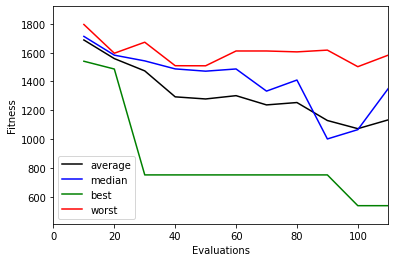

In [11]:
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map

def fitness_eval(distanceToTarget, pathLength, noOfTimestepsWithCollisions, timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget
    return fitness

config = {"sensors": True,
            "nrHiddenNodes": 6,
            "nrHiddenLayers": 1,
            "map":"white.png"
         }
seed = 0
rng = NumpyRandomWrapper(seed)

# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 10  # population size
numGen = 10  # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 2  # tournament size (default 2)
mutationRate = 0.1 # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.5  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 1  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 3  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
ea.selector = inspyred.ec.selectors.tournament_selection

# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
ea.replacer = inspyred.ec.replacers.generational_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
#print('best_candidate', best_candidate,"\n")

best_fitness = final_pop[0].fitness
print('best_fitness', best_fitness,"\n")


os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_"+"distance_to_target_1_hidden_6_nodes"+".pkl", "wb"))

#### Green Goal not reached

In [22]:
os.popen("python post_eval.py results/best_distance_to_target_1_hidden_6_nodes.pkl").read()

''

###  distance to target + timestepToReachTarget + timestepsOnTarget and 3 hidden nodes in 1 hidden layer

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         10 2012.53368 1600.07333 1922.58034 1857.36913 139.937340

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         20 1797.73544 354.043260 1641.46436 1489.97858 437.411842

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         30 1795.41288 354.043260 1055.51541 1077.53008 540.243512

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         40 1004.80129 335.586213 354.043260 482.349163 261.283115

Generation Evaluation      Worst       Best     Median    Average    Std

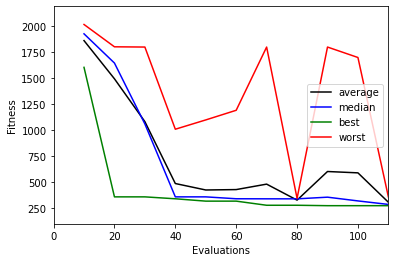

In [32]:
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map

def fitness_eval(distanceToTarget, pathLength, noOfTimestepsWithCollisions, timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget + timestepToReachTarget + timestepsOnTarget
    return fitness

config = {"sensors": True,
            "nrHiddenNodes": 3,
            "nrHiddenLayers": 1,
            "map":"white.png"
         }
seed = 0
rng = NumpyRandomWrapper(seed)

# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 10  # population size
numGen = 10  # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 2  # tournament size (default 2)
mutationRate = 0.1 # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.5  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 1  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 3  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
ea.selector = inspyred.ec.selectors.tournament_selection

# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
ea.replacer = inspyred.ec.replacers.generational_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
print('best_candidate', best_candidate,"\n")

best_fitness = final_pop[0].fitness
print('best_fitness', best_fitness,"\n")


os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_"+"3_obj_1_hidden_3_nodes"+".pkl", "wb"))

#### Green Goal reached in a faster way (best one)

In [31]:
os.popen("python post_eval.py results/best_3_obj_1_hidden_3_nodes.pkl").read() 

''

###  distance to target + timestepToReachTarget + timestepsOnTarget 2 hidden layers (5,5 nodes)

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         20 2012.53368 322.670489 1717.36637 1555.50808 453.893973

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         40 2003.48937 322.670489 1618.72860 1464.83964 518.402765

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         60 1922.58034 322.670489 1411.04618 1243.23438 555.404494

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         80 1815.85376 322.670489 1004.80129 1001.64518 428.916611

Generation Evaluation      Worst       Best     Median    Average    Std

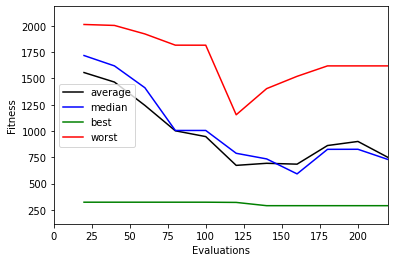

In [33]:
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map

def fitness_eval(distanceToTarget, pathLength, noOfTimestepsWithCollisions, timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget + timestepToReachTarget + timestepsOnTarget
    return fitness

config = {"sensors": True,
            "nrHiddenNodes": 5,
            "nrHiddenLayers": 2,
            "map":"white.png"
         }
seed = 0
rng = NumpyRandomWrapper(seed)

# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 20  # population size
numGen = 10  # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 2  # tournament size (default 2)
mutationRate = 0.1 # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.5  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 1  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 3  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
ea.selector = inspyred.ec.selectors.tournament_selection

# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
ea.replacer = inspyred.ec.replacers.generational_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
#print('best_candidate', best_candidate,"\n")

best_fitness = final_pop[0].fitness
print('best_fitness', best_fitness,"\n")


os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_"+"2_5_5"+".pkl", "wb"))

#### Green Goal reached (instable way)

In [34]:
os.popen("python post_eval.py results/best_2_5_5.pkl").read()

''

# Exercise 2
Let us consider now a second scenario (environment with obstacles). To do so, change in the
configuration dict the parameter map to be ``hard.png``.
First of all, it is interesting to see if the controller evolved in the previous exercise is able to generalize its functioning to this case.
- **Take the best Neural Network evolved in the previous exercise and run it in the new scenario, running the next cell.**
- **What happens in this case? Is the best Neural Network evolved in the previous exercise able to generalize to this new environment? Why?**

In [36]:
import pickle

best_path = "results/best_3_obj_1_hidden_3_nodes.pkl"
data = pickle.load(open(best_path, "rb"))
new_data = (data[0], "utils/utils_9/hard.png", data[2], True)
pickle.dump(new_data, open("results/tmp.pkl", "wb"))

os.popen("python post_eval.py results/tmp.pkl").read()

''

Consider now running a new evolutionary process from scratch, to evolve a controller specific for this new, somehow harder environment.

- **Is the same fitness function you designed in the previous exercise able to guide the evolutionary search also in this case? If not, try to change it appropriately (Hint: you may want to embed in the fitness value multiple metrics, and use some weights if needed). Does the best individual evolved in this scenario generalize to the first scenario?**

- **Try to make the problem even harder, in the attempt to find a controller that is able to drive the robot to the target without touching any walls. What kind of fitness function could you use in this case? You may also want to consider changing the configuration/parameters of the EA**(e.g. larger population, higher number of generations, different mutation/crossover parameters) **and/or the architecture/parameters of the Neural Network** (e.g. add more hidden nodes).

###  100*distance to target + 500*timestepToReachTarget + 100*timestepsOnTarget and 3 hidden nodes in 1 hidden layer

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         10 2073.79783 1617.45600 1884.68199 1867.80276 146.332697

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         20 2013.53368 1617.45600 1740.67879 1778.17423 154.987409

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         30 1923.58034 1559.37647 1618.76525 1668.66268 111.207453

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         40 1642.32454 1559.37647 1617.45600 1613.16392 19.6477528

Generation Evaluation      Worst       Best     Median    Average    Std

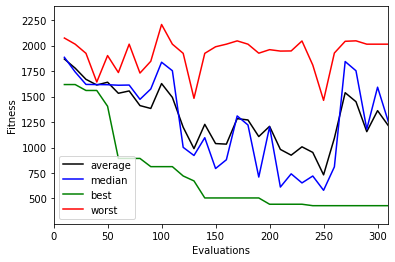

In [54]:
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map

def fitness_eval(distanceToTarget, pathLength, noOfTimestepsWithCollisions,
                 timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget + noOfTimestepsWithCollisions + timestepToReachTarget 
    return fitness

config = {"sensors": True,
            "nrHiddenNodes":  3,
            "nrHiddenLayers": 1,
            "map":"hard.png"
         }
seed = 238842
rng = NumpyRandomWrapper(seed)

# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 10  # population size
numGen = 30 # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 2  # tournament size (default 2)
mutationRate = 0.3  # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.4  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 1  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 2  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
ea.selector = inspyred.ec.selectors.tournament_selection

# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
ea.replacer = inspyred.ec.replacers.generational_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
best_fitness = final_pop[0].fitness
os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_"+"3_1_hard"+".pkl", "wb"))

In [2]:
import os
os.popen("python post_eval.py results/best_3_1_hard.pkl").read()

'pygame 2.1.2 (SDL 2.0.18, Python 3.8.8)\nHello from the pygame community. https://www.pygame.org/contribute.html\n'

Note, you can also design your map, just take the ``white.png`` in the utils folder and modify it with any image editor (e.g. gimp, paint, etc.). Remember to use Black to draw the walls and to make them thick enough, otherwise the car could pass through them. 
Save the new map in the same folder of the ``white.png`` file and modify the config dict element "map" with the name of your map.

## Instruction and questions
Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 
- **What do you think it could change between a simulated and a real-world experiment in the case of a maze navigation task?** <br>
**Sensor Accuracy and Noise:** Simulated experiments often assume ideal sensor accuracy and noise-free measurements. In reality, robotic sensors, such as cameras or range finders, can be subject to various sources of noise and have limitations in accuracy and resolution. Real-world experiments need to consider these sensor characteristics, which can impact perception and decision-making during maze navigation.

**Environment Modeling:** Simulated experiments require a digital representation of the maze environment, typically built using CAD software or virtual reality tools. These models may not capture all the intricacies of real-world environments accurately. For instance, lighting conditions, surface textures, or the presence of occlusions can be challenging to replicate precisely. Real-world experiments, on the other hand, directly interact with the physical environment, providing a more realistic representation of the maze.

**Dynamics and Interactions:** Simulations often simplify the physics and dynamics of the robot and the environment for computational efficiency. In reality, robots need to account for various physical interactions, such as friction, inertia, and contact forces, when navigating the maze. Real-world experiments allow for a more faithful representation of these dynamics, which can significantly influence the robot's motion and control strategies.

**Actuator Limitations:** Simulations typically assume ideal actuator performance, such as instant response, precise control, and unlimited torque. In contrast, real-world robots have physical limitations in terms of actuator speed, accuracy, and power. These limitations can impact the robot's ability to navigate the maze effectively, especially when facing challenging terrain or tight turns.

**Robustness to Uncertainty:** Simulated experiments may overlook or simplify uncertainties present in real-world scenarios. For example, the presence of noise in sensor measurements, uncertainty in perception, or variations in the environment can affect the robot's performance and its ability to navigate the maze successfully. Real-world experiments allow for testing and refining navigation algorithms under more realistic and uncertain conditions.

Safety Considerations: Real-world experiments involving physical robots require additional safety precautions. Since collisions or incorrect actions can lead to damage or injury, safety measures such as collision detection, emergency stop mechanisms, or physical barriers need to be implemented. In simulations, these safety concerns can be mitigated, allowing for risk-free testing and experimentation.
- **Can you think of some possible applications where a maze navigation robot task could be used? Why would it make sense to use Swarm/Evolutionary Robotics in those cases?** <br>


1. **Search and Rescue:** In disaster scenarios, such as collapsed buildings or hazardous environments, maze navigation robots can be deployed to locate and rescue survivors. Swarm robotics can be advantageous in this context, as a group of robots can collaborate to explore and map complex maze-like structures more efficiently. Evolutionary Robotics can help optimize the individual robot behaviors or the collective swarm strategies, enhancing their ability to navigate and locate survivors.

2. **Exploration and Mapping:** Maze navigation robots can be employed for exploration and mapping tasks in unknown or inaccessible environments. Swarm robotics enables a group of robots to distribute themselves throughout the maze, allowing for parallel exploration and comprehensive mapping. Evolutionary Robotics can optimize the navigation and mapping algorithms, enablSwarm/Evolutionary Robotics approaches are suitable for these applications because they offer the following advantages:
